### Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


# Cost Functions

Cost functions take the model, or f(x) with certain parameters, or coefficients and evalute how the given parameters fit with the data. 

Minimizing the cost function will lead to the parameters for the model with the least error for the given dataset leading to the best future predictions of y-hat given the current targets. 

The process of minimizing the cost function is called gradient descent. 

There are different cost functions for different scenarios. Regression algorithms have MSE and other cost functions to calculate the error of the given parameters in relation to the training set. 

Classification algorithms and other unsupervised algorithms also have their own respective cost functions used to calculate the error. 

In order to find the minimum cost function value, you use gradient descent instead of manually testing each possible parameter which is not possible for more complex datasets and cost functions. 

Gradient descent represents the process used to get to the smallest hill in the topology of a cost function with more than one parameter on the 3D graph. 

# Gradient Descent

Gradient descent is the process of taking baby steps to get to the lowest valley on a cost function topology map. 

Imagine a complex topology map for a function that intakes multiple inputs. Gradient descent works not only for linear regression but for any regression with any number of inputs. 

In order to start the process of gradient descent, you pick arbitrary values for the parameters in the cost function. This will put you at some random point on the topology of the map of the gradient descent function. Your goal, imagining the topology as a set of hills and valleys, is to get to the lowest valley with the least amount of steps. 

At that arbitrary point on the topology, you look around and pick the steepest descent point around you. This is called the point of steepest descent. 

You do this enough times to the point where you get to the bottom of the cloest valley to the arbitrary point you chose. This represents a local minima, but does not represent the absolute minimum of the cost function. 

For a function J(w, ... , b) that is not linear, know that when you take the partial derivative of the function with respect to one variable, it will not be a parabola like with the linear regression cost function. As a result, on the 2D graph of the partial parameter on the horizontal axis and the cost function on the vertical axis, there will be multiple minimum and as a result, the starting value of the parameter matters as you might get a local minima instead of the absolute minima of the 2D graph. 

Assuming the cost function is linear and we have a 2D parabola with J(w,b) on the y-axis and w on the x-axis, we can use the gradient descent algorithm to find the minimum of the cost function. 

Algorithm:
-> w = w - a(pd(J(w,b))
-> b = b - a(pd(J(w,b)) 
    
    **Note:** The new values for w and b must be assigned simultaneously therefore you need a temp variable for each one. 
    
This works because if w is greater than the minimum, the derivative will be positive and therefore you will be subtracting a positive value after multiplying the derivative with alpha from the original w and that will cause w to shrink until the derivative becomes 0 at the minimum point. 

On the other hand, if the w value is smaller than the w value for the minimum of the cost function, then you will be subtracting a negative value from the current w value as the derivative will be downward sloping. As a result, subtracting a negative number means adding a positive number so the current w value will increase until it is at the minimum of the graph. 




# Supervised Learning

>Supervised learning refers to giving a certain dataset of values with “correct” or known outputs to a machine learning algorithm which will then use those known/correct answers to each input in order to develop a model to predict future values. 

## Regression

>Regression refers to the relation between x and y and how given x, the computer must predict y based on the known y-values given out of an infinite possibilities of numbers. Essentially, a regression works like a function f(x) where you are given an independent variable x and asked to predict a y-value and if f(x) is not defined, that y-value can have infinite possibilities. This is exactly the case when giving data to a machine learning model. F(x) for that data is not defined. Therefore, the machine learning model must define its own f(x) to learn from the inputs and outputs given to produce a function that can take in any input and predict the output. 

### Cost Function for Regression: MSE

MSE -> Mean Squared Errors
- It is the summation of the square of the difference between y-hat and y from i=0 to m divided by the total number of training examples m. 
- Will give a number that indicates the degree to which the predicted values y-hat deviate from the target values y.
- Can be used for linear and polynomial regression. Usually, it can be used for any regression algorithm. 

### Linear Regression

Easy Linear Regression Algorithm using Scipy

0.9598758089102879


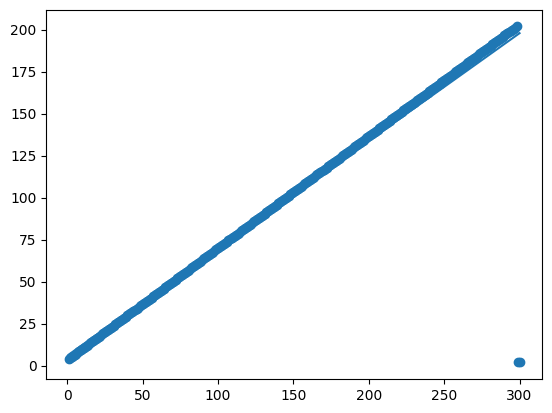

In [18]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy
import pandas

df = pd.read_csv(r"C:\Users\Krishiv\Documents\GitHub\Jupyter_2\linear_regression_dataset1.csv")

x = list(df["X"])
y = list(df["Y"])

slope, intercept, r, p, str_err = stats.linregress(x,y)

#this is also the function that can predict future values of x, the independent variable, and give the value of y based on the data.
#However, the accuracy of the prediction depends on r, the Pearson Correlation Coefficient. 
#The closer r is to either -1 or 1, the higher the accuracy of the prediction 
def mapper(x):
    return slope*x + intercept


y_linear = list(map(mapper,x))
#need to convert to list because map will not return one by default and plt.plot only takes in lists

plt.scatter(x,y)
plt.plot(x, y_linear)
print(r)
#the r-value is very low in the negative direction indicating that the dataset is not very linearly related

#### Linear Regression From Scratch using Gradient Descent

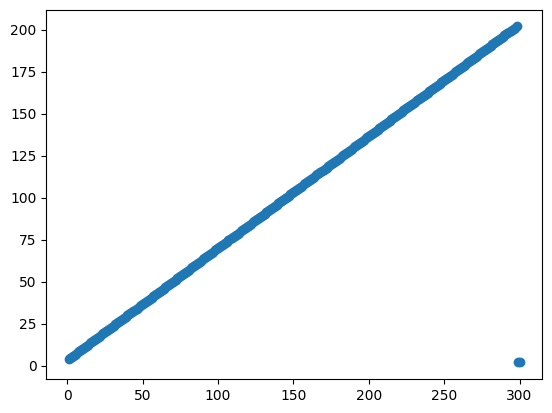

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

w = 0.0
b = 0.0

def main():

    global w
    global b

    df = pd.read_csv(r"C:\Users\Krishiv\Documents\GitHub\Jupyter_2\linear_regression_dataset1.csv")

    features = list(df["X"])
    targets = list(df["Y"])

    m = len(features)

    new_w, new_b = gradient_descent(m, features, targets, w, b)

    w = new_w
    b = new_b

    y_hat = list(map(mapper, features))

    plt.scatter(features, targets)
    plt.plot(features, y_hat)
    plt.show()

def mapper(x):
    return w*x + b

def gradient_descent(m, features, targets, w,b):

    a = 0.01
    max_iterations = 1000
    tolerance = 1e-6
    
    for _ in range(max_iterations):

        temp_w = w - a*partial_deriv_w(m, features, targets, w , b)
        temp_b = b - a*partial_deriv_b(m, features, targets, w, b)
        
        if abs(temp_w - w) < tolerance or abs(temp_b - b) < tolerance:
            break
        
        w = temp_w
        b = temp_b
    
    return w, b

def partial_deriv_w(m, features, targets, w, b):

    sum = 0.0
    
    for i in range(m):
        sum += ((w*features[i] + b)-targets[i])*features[i]

    return float(sum/m)

def partial_deriv_b(m, features, targets, w, b):

    sum = 0.0

    for i in range(m):
        sum += ((w*features[i] + b)-targets[i])

    return float(sum/m)

main()

### Polynomial Regression

#### Polynomial Regression from Scratch using Gradient Descent and Kaggle Dataset

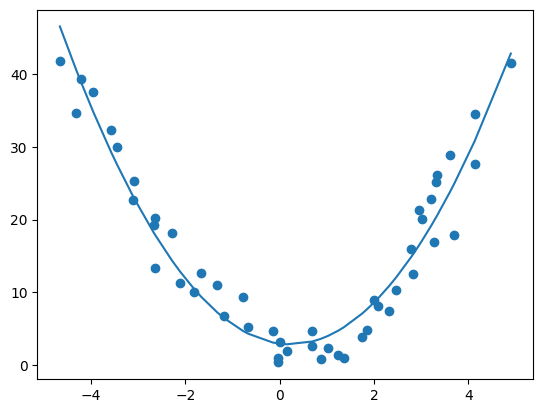

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt

w = 0.0
w1 = 0.0
b = 0.0
#wx^2 + w_1x + b

def main():

    df = pd.read_csv(r"C:\Users\Krishiv\Documents\GitHub\Jupyter_2\poly_icecream_data.csv")

    features = list(df["Temperature (°C)"])
    targets = list(df["Ice Cream Sales (units)"])

    m = len(features)

    gradient_descent(features, targets, m)

    y_hat = list(map(mapper, features))

    plt.scatter(features, targets)
    plt.plot(features, y_hat)
    plt.show()

def mapper(x):
    return (w*(x**2) + w1*x + b)

def gradient_descent(x, y, m, a = 0.01, max_iter = 1000, tolerance = 1e-6):
    
    global w
    global w1
    global b
    
    for _ in range(max_iter):

        temp_w = w - a*partial_deriv_w(x, y, m)
        temp_w1 = w1 - a*partial_deriv_w1(x, y, m)
        temp_b = b - a*partial_deriv_b(x, y, m)

        if abs(temp_w - w) < tolerance and abs(temp_w1 - w1) < tolerance and abs(temp_b - b) < tolerance:
            break
        
        w = temp_w
        w1 = temp_w1
        b = temp_b

def partial_deriv_w(x, y, m):

    sum = 0.0
    
    for i in range(m):
        sum += (((w*(x[i]**2) + w1*x[i] + b) - y[i])*(x[i]**2))

    return sum/m

def partial_deriv_w1(x, y, m):

    sum = 0.0
    
    for i in range(m):
        sum += (((w*(x[i]**2) + w1*x[i] + b) - y[i])*x[i])

    return sum/m

def partial_deriv_b(x, y, m):

    sum = 0.0
    
    for i in range(m):
        sum += ((w*(x[i]**2) + w1*x[i] + b) - y[i])

    return sum/m


main()
    

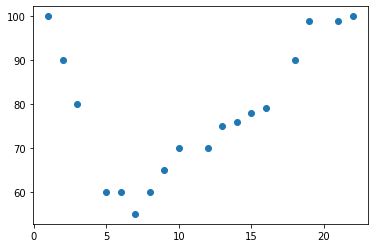

In [3]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
#imported datasets which have a polynomial relation for example sake

plt.scatter(x,y)
plt.show()

#### Constructing a Polynomial Function and Graphing it in Python

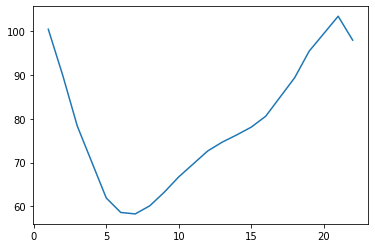

In [5]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
#same dataset as above

coefficients = numpy.polyfit(x,y, 6)
#numpy.polyfit will use a vandermonde matrix to calculate the coefficients of a 4th degree polynomail as specified above by the number 4
#It will return a list of coefficients. The length of the list will always be 1 more than the degree specified due to x^0

polynomial = numpy.poly1d(coefficients, r=False)
#numpy.poly1d will construct a one dimensional polynomial given a list of coefficients. 
#Each coefficient will be matched to x^d descending so the the last term in the list of cofficients will be matched with x^0 power
#And the first term will be matched to x^d power
#numpy.poly1d returns a polynomial object which represents the function f(x)
#polynomial(2) would be the same as passing in f(2) into a function

plt.plot(x, polynomial(x))
plt.show()

<p>As shown above, the graph is not smooth, but this can be fixed.</p>

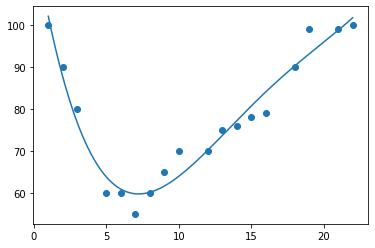

In [32]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

polynomial = numpy.poly1d(numpy.polyfit(x,y,4), r=False)
#the higher the power of the polynomial, the more accurately it will predict the future result as it will more accurately represent the given dataset

x_int_smooth = numpy.linspace(1, 22, 1000)
#numpy.linspace is a function that will create a list of evenly spaced number of the specified length between lower and upper bounds.
#the lower bound is 1 and the upper is 22 in this case so from x=1 to x=22, a list of 1000 evenly spaced numbers are generated. 
"""this is extremely useful since x is the independent variable so once you determine the polynomial that corresponds with the set, 
you can just create a bunch of evenly spaced numbers between the domain for the independent variable, x in this case"""

plt.plot(x_int_smooth, polynomial(x_int_smooth))
"""Here, instead of using the original list of given independent variable values given, which is only 22 and thus creates a choppy graph, 
we use the linspace list which have 1000 values of x which creates a really smooth graph. 
We then pass that smooth list into the polynomial since that is a function of the data used to predict the future values"""

plt.scatter(x,y)
#over the polynomial over the scatter plot to show the polynomial regression relationship
plt.show()

#### Derivatives and Integrals of Polynomials

In [16]:
p1 = numpy.poly1d([1,1,1,1], r=False)
#Creates a 3rd degree polynomial with 4 coefficients: x^3 + x^2 + x + 1

p2 = numpy.polyder(p1, m=1)
#polyder takes the derivative of p1 and the second parameter specifies the degree of the derivative
#in this case, it takes the 3rd order derivative of p1

p3 = numpy.polyint(p1, m=1, k=[1])
#polyint takes the integral of p1 and the 2nd paramter represents the order of the antiderivative function. 
#If you want to integrate a function multiple times, set m = # of times you want to integrate it
#k represents the constants of integration that arise when taking the antiderivative of a number
"""When we take the antiderivative of a number, that antiderivative itself is not unique to that function and any function can have
an infinite number of antiderivatives which are only uniqe to the function given a constant C. k represents a list of constants the length of which
should correspond to the value of m as there if no need to provide more constants than the number of times you take the antiderivative. 

C is the value of the initial condition of the antiderivative function given the original polynomial. If you are integrating a velocity function 
to find the position function, then the initial condition would be p(#) = # representing the original position of the antiderivative function 
which is position in this case."""

print(p1)
print()
print(p2)
print()
print(p3)

   3     2
1 x + 1 x + 1 x + 1

   2
3 x + 2 x + 1

      4          3       2
0.25 x + 0.3333 x + 0.5 x + 1 x + 1


### Multiple Regression

## Classification 

> - Classification is categorical relations between data and the number of outputs is restricted. With classification algorithms, a certain amount of input/s are given and the output is limited to a set number of categories provided by the user. The output must be one of those categories, nothing else. This differs from regression which can have infinite possibilities for y-values. For each input/s given, the output will be one of the categories represented by a number. 
> - For multiple inputs, they can be graphed on x and y axis as inputs and the output can be represented by a shape that corresponds with the category it represents. 
> - These algorithms are used to predict the classification of something when the number of possible outputs are known and a number of inputs are given. 
> - For example, for a classification algorithm that classifies whether a tumor is benign or malignant, a given number of inputs such as patent’s age, tumor size, cell uniformity, etc are given to the ML model and it is asked to used these values and previous classifications that are known/correct to now help diagnose whether the tumor is benign or malignant. 
> - All in all, just know that within supervised learning, where known outputs for a given set of inputs are given to a ML model so it can predict future outputs, if the possible number of outputs is limited, it is a classification algorithm. 

# Unsupervised Learning

>Unsupervised learning refers to giving data to a computer and asking it to find patterns within that data without any specifications for what patterns it should look for. 

## Clustering

>- Given a dataset to a ML model, unsupervised clustering refers to the computer finding interesting patterns within the data and grouping it into clusters. 
>- Essentially, unsupervised learning looks at a dataset and makes clusters or groups of give data points that have similarities to one another
>- Ex: Google news uses clustering to group together articles that share keywords and that changes everyday. The algorithm is given data in the form of millions of articles and is tasked with clustering the articles based on their similarities and if there are articles that are popular, it will display them first on the google news tab.

## Anomaly Detection

> Where data is given to a ML model and it is tasked with detecting any anomalies within the patterns associated with the data. If a clear pattern is established and the model detects that something is amiss with the pattern, it is an anomaly. Used for fraud detection. 

## Dimensional Reduction

>Given a large dataset, a ML model is able to reduce it into a much smaller data set while retaining the overall structure and relations. 